In [1]:
using Distributions, Compat, Plots, Random, CSV, DataFrames, GLM, Printf
#plotly()
upscale = 1
default(line = (:line, 0.5, 1, 2), size=(800*upscale,600*upscale))

┌ Info: Recompiling stale cache file /home/meszlenyilorant/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/meszlenyilorant/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/meszlenyilorant/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/meszlenyilorant/.julia/compiled/v1.0/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1190


In [2]:
include("../KalmanFilter.jl")
import .KalmanFilter

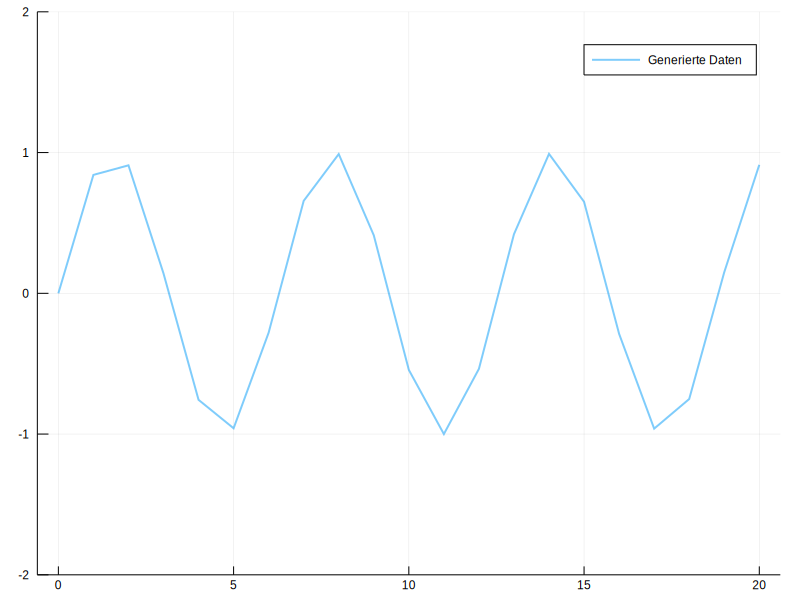

In [9]:
x = collect(0:1:20)
y = sin.(x)
plot(x, y, ylim = (-2, 2), label = "Generierte Daten")

In [10]:

A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = 5
R = 5

x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur)
    y_predicted[index] = KalmanFilter.predict(model)
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

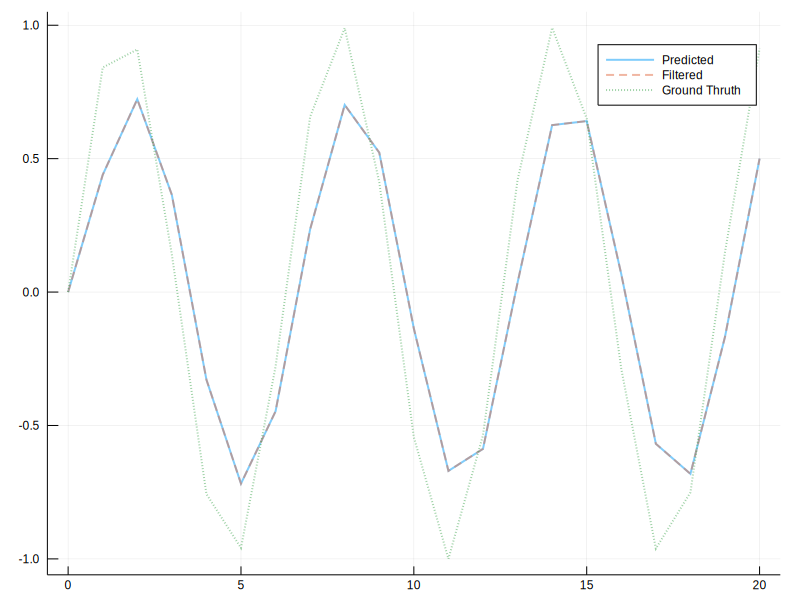

In [11]:
plot(x, y_predicted, label = "Predicted")
plot!(x, y_filtered, label = "Filtered", linestyle=:dash)
plot!(x, y, label = "Ground Thruth", linestyle=:dot)